In [3]:
import cufflinks as cf

In [2]:
#!pip install country-converter
import country_converter as coco

In [1]:
!pip install country-converter
!pip install cufflinks

    100% |████████████████████████████████| 51kB 22.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for country-converter ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f9/4a/e7/c8ef69407e41021c414dd56e50bdac424efd1bca3a4346eeb1
Successfully built country-converter
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 81kB 30.3MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 35.6MB/s ta 0:00:01


  Running setup.py bdist_wheel for cufflinks ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/44/d7/dc/e830ab00bc2dd3b2731295103baa070f8cbdda8891f71a7a8d
Successfully built cufflinks
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from _plotly_future_ import v4_subplots
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
sns.set()

In [7]:
#qny = pd.read_csv('kaggle-survey-2019/questions_only.csv')

In [8]:
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kernel34050a2e14 (1).ipynb
./submission.csv
./Categorical Feature Encoding Challenge.ipynb
./multipleChoiceResponses.csv
./multiple_choice_responses.csv
./multipleChoiceResponses18.csv
./Categorical Feature Encoding Challenge_Submission.ipynb
./Home Credit Default Risk.ipynb
./kaggle-survey-2019.ipynb
./.ipynb_checkpoints/kernel34050a2e14 (1)-checkpoint.ipynb
./.ipynb_checkpoints/Categorical Feature Encoding Challenge-checkpoint.ipynb
./.ipynb_checkpoints/Categorical Feature Encoding Challenge_Submission-checkpoint.ipynb
./.ipynb_checkpoints/kaggle-survey-2019-checkpoint.ipynb
./.ipynb_checkpoints/Home Credit Default Risk-checkpoint.ipynb


In [9]:
mcr = pd.read_csv('multiple_choice_responses.csv')
#otr = pd.read_csv('kaggle-survey-2019/other_text_responses.csv')
#qny = pd.read_csv('kaggle-survey-2019/questions_only.csv')
#ss = pd.read_csv('kaggle-survey-2019/survey_schema.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.



In [10]:
mcr18 = pd.read_csv('multipleChoiceResponses18.csv')
mcr17 = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.



In [11]:
mcr2 = mcr[1:]
#mcr2.isnull().sum()

In [12]:
mcr17.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
mcr17_summ = pd.DataFrame({'dtype':mcr17.dtypes,'nunique':mcr17.nunique(),
              'quest':mcr17.columns.tolist(),
              'values_list':[mcr17[i].value_counts().index.tolist() for i in mcr17.columns.tolist()]})

In [14]:
mcr17_summ.head()

,dtype,nunique,quest,values_list
GenderSelect,object,4,GenderSelect,"[Male, Female, A different identity, Non-binar..."
Country,object,52,Country,"[United States, India, Other, Russia, United K..."
Age,float64,84,Age,"[25.0, 24.0, 26.0, 27.0, 23.0, 30.0, 28.0, 29...."
EmploymentStatus,object,7,EmploymentStatus,"[Employed full-time, Not employed, but looking..."
StudentStatus,object,2,StudentStatus,"[Yes, No]"


In [15]:
mcr17['Age'] = pd.cut(mcr17['Age'],[18,22,25,30,35,40,45,50,55,60,70,80,90],labels=['25-29', '22-24', '30-34', '18-21', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69','70-79','80+'])

In [17]:
mcr182 = mcr18.loc[1:]

In [18]:
mcr18_summ = pd.DataFrame({'dtype':mcr182.dtypes,'nunique':mcr182.nunique(),
              'quest':mcr18.loc[0],
              'values_list':[mcr182[i].value_counts().index.tolist() for i in mcr182.columns.tolist()]})

In [19]:
mcr18_summ.head()

,dtype,nunique,quest,values_list
Time from Start to Finish (seconds),object,7641,Duration (in seconds),"[101, 142, 94, 156, 106, 131, 102, 134, 93, 10..."
Q1,object,4,What is your gender? - Selected Choice,"[Male, Female, Prefer not to say, Prefer to se..."
Q1_OTHER_TEXT,object,69,What is your gender? - Prefer to self-describe...,"[-1, -1, 42, 25, 20, 14, 11, 63, 18, 29, 26, 2..."
Q2,object,12,What is your age (# years)?,"[25-29, 22-24, 30-34, 18-21, 35-39, 40-44, 45-..."
Q3,object,58,In which country do you currently reside?,"[United States of America, India, China, Other..."


In [20]:
#questions = qny.loc[0].values.tolist()

In [21]:
mcr182.loc[mcr182['Q1'] == '70+','Q1'] = '70-79'

In [22]:
mcr182['Q2'].value_counts()

25-29    6159
22-24    5141
30-34    3776
18-21    3037
35-39    2253
40-44    1360
45-49     858
50-54     582
55-59     328
60-69     273
70-79      53
80+        39
Name: Q2, dtype: int64

In [23]:

mcr_summ = pd.DataFrame({'dtype':mcr2.dtypes,'nunique':mcr2.nunique(),
              'quest':mcr.loc[0],
              'values_list':[mcr2[i].value_counts().index.tolist() for i in mcr2.columns.tolist()]})


In [24]:
mcr_summ.head()

,dtype,nunique,quest,values_list
Time from Start to Finish (seconds),object,5304,Duration (in seconds),"[450, 434, 412, 123, 449, 335, 142, 467, 495, ..."
Q1,object,11,What is your age (# years)?,"[25-29, 22-24, 30-34, 18-21, 35-39, 40-44, 45-..."
Q2,object,4,What is your gender? - Selected Choice,"[Male, Female, Prefer not to say, Prefer to se..."
Q2_OTHER_TEXT,object,48,What is your gender? - Prefer to self-describe...,"[-1, -1, 0, 9, 17, 26, 25, 24, 23, 22, 21, 20,..."
Q3,object,59,In which country do you currently reside?,"[India, United States of America, Other, Brazi..."


## Age groups

In [26]:
mcr2['Q1'].value_counts().iplot(kind='bar')

In [27]:
mcr182['Q2'].value_counts().iplot(kind='bar')

In [28]:
mcr17['Age'].value_counts().iplot(kind='bar')

In [29]:
mcr17['Age'].value_counts()

30-34    3998
18-21    2795
22-24    2706
25-29    1866
35-39    1822
40-44    1101
45-49     789
50-54     480
55-59     324
60-69     255
70-79      40
80+         2
Name: Age, dtype: int64

In [30]:
Age = pd.DataFrame([mcr17['Age'].value_counts(),mcr182['Q2'].value_counts(),mcr2['Q1'].value_counts()])

In [31]:
Age.rename(index = {'Age':'2017','Q2':'2018','Q1':'2019'},inplace=True)

In [32]:
Age.T.iplot(kind='bar')

### Compared to 2019 more younger people are interested in Data Science in 2018
### Age 40 and above people are gradually increasing by the year

In [33]:
Age.T.iplot(kind='line')

### Elder people are stared, younger people exploded, finally they find balance,--> 2017,2018,2019

.

# Gender

In [34]:
mcr17.loc[mcr17['GenderSelect'] == 'A different identity','GenderSelect'] ='Prefer not to say'

In [35]:
mcr17.loc[mcr17['GenderSelect'] == 'Non-binary, genderqueer, or gender non-conforming','GenderSelect'] = 'Prefer to self-describe'

In [36]:
pd.DataFrame({'2017' :mcr17['GenderSelect'].value_counts(),
             '2018':mcr182['Q1'].value_counts(),
             '2019':mcr2['Q2'].value_counts()}).T.iplot(kind='bar')

In [37]:
mcr2['Q3'].value_counts()[:5].iplot(kind='bar')

# Top 10 Countries with the majority of respondent

In [38]:

labels = mcr2['Q3'].value_counts()[:10].index
values = mcr2['Q3'].value_counts()[:10]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [39]:
labels = mcr2.loc[mcr2['Q2'] == 'Male','Q3'].value_counts()[:10].index
values = mcr2.loc[mcr2['Q2'] == 'Male','Q3'].value_counts()[:10]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [40]:
mcr2.loc[mcr2['Q1'] == '70+','Q1'] = '70-79'

In [41]:

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

labels = mcr2.loc[mcr2['Q2'] == 'Male','Q3'].value_counts()[:10].index
values = mcr2.loc[mcr2['Q2'] == 'Male','Q3'].value_counts()[:10]

fig.add_trace(go.Pie(labels=labels, values=values, title='Male'),
              1, 1)

labels = mcr2.loc[mcr2['Q2'] == 'Female','Q3'].value_counts()[:10].index
values = mcr2.loc[mcr2['Q2'] == 'Female','Q3'].value_counts()[:10]
fig.add_trace(go.Pie(labels=labels, values=values,title='Female'),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Top 10 Countries with the majority of respondent",
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
     #            dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)]
)



fig.show()

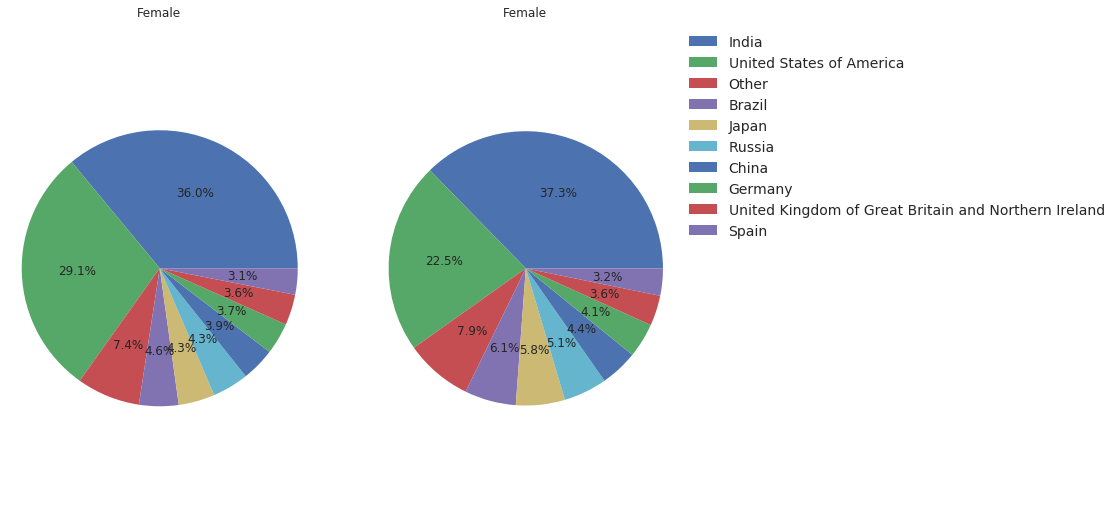

In [42]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mcr2.loc[mcr2['Q2'] == 'Female','Q3'].value_counts()[:10].index
values = mcr2.loc[mcr2['Q2'] == 'Female','Q3'].value_counts()[:10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(1,2,figsize=(12,9))
ax1[0].pie(values,autopct='%1.1f%%')
ax1[0].axis('equal')
ax1[0].set_title("Female")


labels = mcr2.loc[mcr2['Q2'] == 'Male','Q3'].value_counts()[:10].index
values = mcr2.loc[mcr2['Q2'] == 'Male','Q3'].value_counts()[:10]

ax1[1].pie(values,autopct='%1.1f%%')
ax1[1].axis('equal')
ax1[1].set_title("Female")

ax1[1].legend(labels,bbox_to_anchor=(1, 0, 0.5, 1),fontsize=14)

#plt.tight_layout()

plt.show()

In [43]:
mcr2['Q2'].value_counts()

Male                       16138
Female                      3212
Prefer not to say            318
Prefer to self-describe       49
Name: Q2, dtype: int64

In [44]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

values = mcr2['Q2'].value_counts()
labels = mcr2['Q2'].value_counts().index

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,title='2019',titlefont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

# Gender Distribution over the years

In [45]:
values = mcr2['Q2'].value_counts()
labels = mcr2['Q2'].value_counts().index

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

values = mcr17['GenderSelect'].value_counts()
fig.add_trace(go.Pie(labels=labels, values=values, title="2017"),
              1, 1)

values = mcr182['Q1'].value_counts()
fig.add_trace(go.Pie(labels=labels, values=values, title="2018"),
              1, 2)

values = mcr2['Q2'].value_counts()
fig.add_trace(go.Pie(labels=labels, values=values, title="2019"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent",marker=dict(colors=colors, line=dict(color='#000000', width=2)))

#fig.update_traces(hoverinfo='label+percent', textfont_size=16,title='2019',titlefont_size=16,
                  #marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

In [46]:
converter = coco.CountryConverter()

mcr2['country_iso3'] = mcr2['Q3'].apply(lambda a : converter.convert(names =a,not_found=np.NaN, to = 'ISO3') )
mcr2['continent'] = mcr2['country_iso3'].apply(lambda a : converter.convert(names = a, not_found=np.NaN, to = 'continent') )


In [47]:
mcr182['country_iso3'] = mcr182['Q3'].apply(lambda a : converter.convert(names =a,not_found=np.NaN, to = 'ISO3') )
mcr17['country_iso3'] = mcr17['Country'].apply(lambda a : converter.convert(names =a,not_found=np.NaN, to = 'ISO3') )

In [48]:
mcr182['continent'] = mcr182['Q3'].apply(lambda a : converter.convert(names =a, not_found=np.NaN, to = 'continent') )
mcr17['continent'] = mcr17['Country'].apply(lambda a : converter.convert(names =a, not_found=np.NaN, to = 'continent') )

In [49]:
mcr2['Q3'] = mcr2['country_iso3'].apply(lambda a : converter.convert(names =a,not_found=np.NaN, to = 'name_short') )
mcr182['Q3'] = mcr182['country_iso3'].apply(lambda a : converter.convert(names =a,not_found=np.NaN, to = 'name_short') )
mcr17['Country'] = mcr17['country_iso3'].apply(lambda a : converter.convert(names =a,not_found=np.NaN, to = 'name_short') )

In [50]:
mcr182['Q3'].head()

1    United States
2        Indonesia
3    United States
4    United States
5            India
Name: Q3, dtype: object

In [51]:
mcr17['Country'].head()

0              NaN
1    United States
2           Canada
3    United States
4           Taiwan
Name: Country, dtype: object

In [52]:
import plotly.express as px

gapminder = pd.DataFrame({'count':mcr2['country_iso3'].value_counts()}).reset_index()
fig = px.choropleth(gapminder, locations="index",
                    color="count", # lifeExp is a column of gapminder
                    hover_name="index", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Blues,
                    title='The Nationality of Respondents in 2019',
                    
                   )
fig.show()

In [53]:
mcr2.loc[mcr2['Q2'] == 'Female','Q3'].value_counts()[:20].sort_values().iplot(kind='barh')

In [54]:
pd.DataFrame({'2019': mcr2.loc[mcr2['Q2'] == 'Female','country_iso3'].value_counts(),
              '2018': mcr182.loc[mcr182['Q1'] == 'Female','country_iso3'].value_counts(),
              '2017': mcr17.loc[mcr17['GenderSelect'] == 'Female','country_iso3'].value_counts()
             }).loc[['IND','USA']].T.iplot(kind='bar')

In [55]:
pd.DataFrame({'2019': mcr2.loc[mcr2['Q2'] == 'Female','country_iso3'].value_counts(),
              '2018': mcr182.loc[mcr182['Q1'] == 'Female','country_iso3'].value_counts(),
              '2017': mcr17.loc[mcr17['GenderSelect'] == 'Female','country_iso3'].value_counts()
             }).loc[['IND','USA']].T.iplot(kind='bar')

In [56]:
 converter.convert(names =['Algeria','Nigeria','Egypt','Kenya','South Africa'],not_found=np.NaN, to = 'ISO3')

['DZA', 'NGA', 'EGY', 'KEN', 'ZAF']

# Daunting obstacles remain in Africa

In [57]:
pd.DataFrame({'2019':[mcr2[mcr2['country_iso3'].isin(['DZA', 'NGA', 'EGY', 'KEN', 'ZAF'])].groupby('Q2')['Q2'].value_counts().loc['Female'].values[0]],
             '2018':[mcr182[mcr182['country_iso3'].isin(['DZA', 'NGA', 'EGY', 'KEN', 'ZAF'])].groupby('Q1')['Q1'].value_counts().loc['Female'].values[0]],
             '2017':[mcr17[mcr17['country_iso3'].isin(['DZA', 'NGA', 'EGY', 'KEN', 'ZAF'])].groupby('GenderSelect')['GenderSelect'].value_counts().loc['Female'].values[0]]
             }).T.iplot(kind='bar',
                        title='Total African Females respondents over the years',
                        xTitle='year',yTitle='no users'
                       )




# Algerian females make an appearance

In [58]:
countries = ['South Africa','Egypt','Kenya','Nigeria','Algeria']

In [59]:
pd.DataFrame({'2019': mcr2.loc[mcr2['Q2'] == 'Female','Q3'].value_counts(),
              '2018': mcr182.loc[mcr182['Q1'] == 'Female','Q3'].value_counts(),
              '2017': mcr17.loc[mcr17['GenderSelect'] == 'Female','Country'].value_counts()
             }).loc[countries].T.iplot(kind='bar')

# Country wise Age distribution

In [60]:
age_dist_20 = mcr2[['Q1','Q3']].groupby(['Q3'])['Q1'].value_counts().unstack().sort_values(axis=0, ascending=False,by='25-29')[:20]

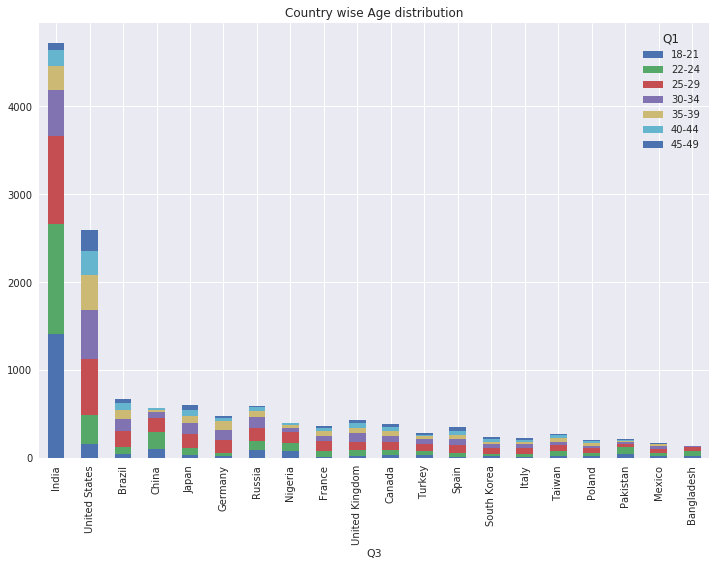

In [61]:

age_dist_20.loc[:,'18-21':'45-49'].plot(kind='bar',stacked=True,figsize=(12,8),title='Country wise Age distribution',)
plt.show()

In [62]:
edu_dist = mcr2.loc[mcr2['Q2'] =='Female', 'Q4'].value_counts()/ mcr2[mcr2['Q2'] =='Female']['Q2'].shape *100

In [63]:
edu_dist.iplot(kind='barh',
               xTitle='Percentage of Female Respondents',
               title='Educational Qualifications of the Females respondents in 2019',
               )

# Educational qualifications of the female respondents, country wise

In [64]:
top10 = mcr2[['Q2','Q3','Q4']].loc[mcr2['Q2']=='Female'].groupby(['Q3'])['Q4'].value_counts().unstack().sum(axis=1).sort_values(ascending=False)[:10]

In [65]:
top10_dist = mcr2[['Q2','Q3','Q4']].loc[mcr2['Q2']=='Female'].groupby(['Q3'])['Q4'].value_counts().unstack().loc[top10.index.tolist()][:10]

In [67]:
top10_dist.divide(top10*0.01,axis=0).iplot(kind='bar',
                                           title='Country wise distribution of Females educational qualification in 2019',
                                           yTitle='Percentage of Female Respondents'
                                          )